# Multiple Linear Regression – Toyota Corolla Price Prediction (ROBUST FINAL VERSION)

## 1. Load Libraries and Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:

df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## 2. Exploratory Data Analysis

In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


### Correlation Matrix (Numeric Variables Only)

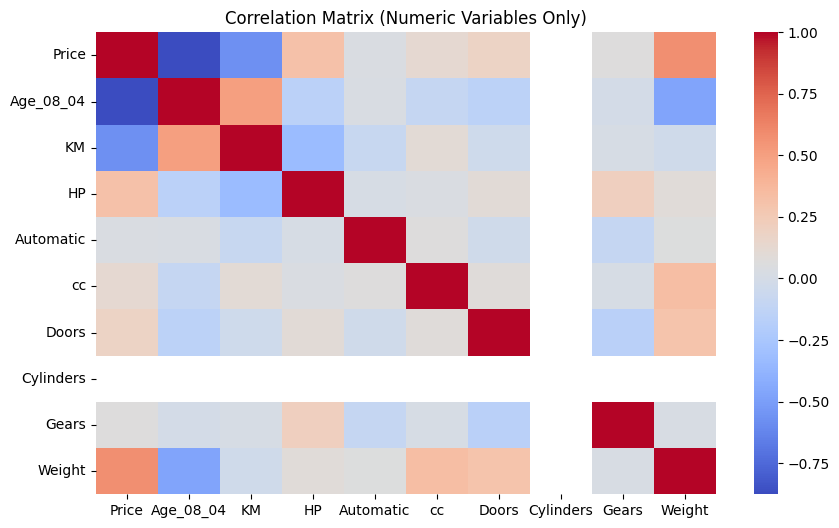

In [4]:

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Variables Only)")
plt.show()


## 3. Data Preprocessing (Robust Handling of Categorical Variables)

In [5]:

# Explicitly separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# One-hot encode categorical variables safely
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


## 4. Feature-Target Split and Scaling

In [6]:

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5. Train-Test Split

In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## 6. Model 1 – Multiple Linear Regression

In [8]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


## 7. Model 2 – Reduced Linear Regression

In [9]:

# Drop less influential features if present
reduced_X = X.drop(columns=[col for col in ['Doors', 'Quarterly_Tax'] if col in X.columns])

X_red_scaled = scaler.fit_transform(reduced_X)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_red_scaled, y, test_size=0.2, random_state=42
)

lr_reduced = LinearRegression()
lr_reduced.fit(Xr_train, yr_train)
y_pred_reduced = lr_reduced.predict(Xr_test)


## 8. Ridge and Lasso Regression

In [10]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


## 9. Model Evaluation

In [11]:

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:", r2_score(y_true, y_pred))


In [12]:

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(yr_test, y_pred_reduced, "Reduced Linear Regression")
evaluate(y_test, y_pred_ridge, "Ridge Regression")
evaluate(y_test, y_pred_lasso, "Lasso Regression")



Linear Regression
MAE: 990.8872739193968
RMSE: 1484.2654153296521
R2: 0.834888804061108

Reduced Linear Regression
MAE: 996.4345054725555
RMSE: 1478.90083179439
R2: 0.8360801706522889

Ridge Regression
MAE: 990.8667646951048
RMSE: 1483.4695850205794
R2: 0.8350658145414687

Lasso Regression
MAE: 990.8885614047144
RMSE: 1484.254934320386
R2: 0.8348911358891582
